<a href="https://colab.research.google.com/github/parksangeeon/AI/blob/main/%5BAI2025%5D_Clustering1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [TODO]

## Mall custermer data

There is information on the customer's gender, age, and annual revenue, and spending score filled with scores from 1 to 100 on the purchase amount.

In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/wonseok-hong/DAP_TA/main/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


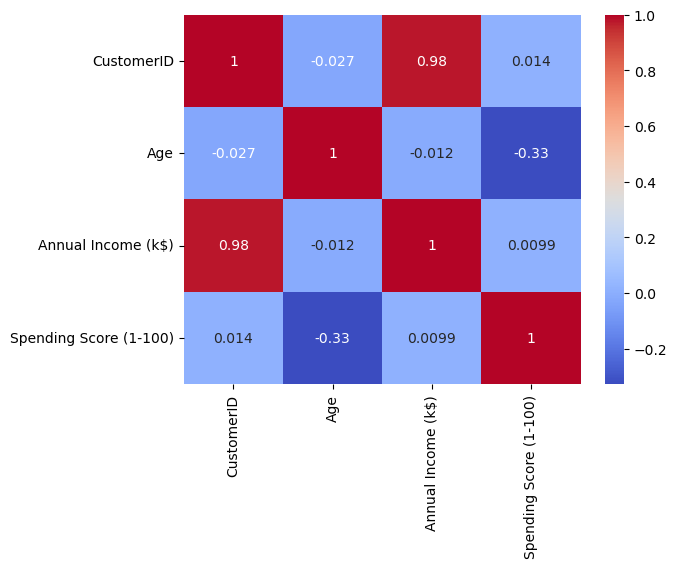

In [2]:
# Select Numeric Values
import seaborn as sns
import matplotlib.pyplot as plt

df = df.select_dtypes(include=['int64', 'float64'])

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

plt.show()

##Data Preprocessing

We will choose Annual Income (k$), Spending Score (1-100), and Z-score Scaling (by sklearn.preprocessing.StandardScaler)

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Choosing
data = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Scaling
data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

data.head()

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


## Elbow analysis with K-MEANS

c:\Users\sangeon\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] 지정된 파일을 찾을 수 없습니다
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\sangeon\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\sangeon\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\sangeon\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

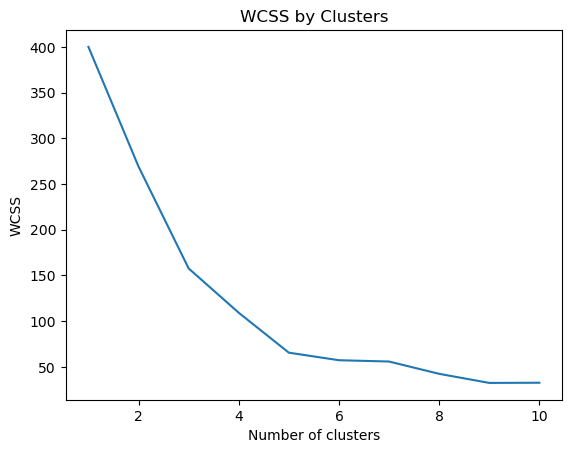

In [4]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

# Create 10 models with 1 to 10 clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)

    # Fit the data points
    kmeans.fit(data)

    # Get the WCSS (inertia) value
    wcss.append(kmeans.inertia_)

#Plot the WCSS values onto a line graph
plt.plot(range(1, 11), wcss)
plt.title('WCSS by Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### K-means fitting
- n_clusters = k
- random_state = 0


In [5]:
from sklearn.cluster import KMeans

k = 3

model = KMeans(n_clusters=k, random_state=0)

# fitting
model.fit(data)

# predicting
pred = model.predict(data)

df['cluster'] = pred

c:\Users\sangeon\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### Scatter Plot with Cluster Color

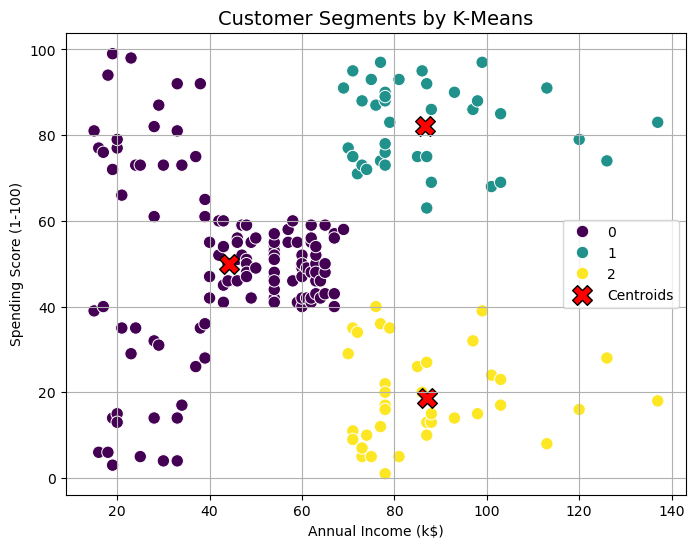

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns


# Scatterplot
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='cluster',            # Divide Cluster Color
    palette='viridis',
    data=df,                  # restoring scale : df
    s=80                      # Dot size
)

# Spotting Cluster Centroids (restoring original location before z-score)
centers_original = scaler.inverse_transform(model.cluster_centers_)
plt.scatter(
    centers_original[:, 0], centers_original[:, 1],
    c='red', s=200, marker='X', edgecolor='black', label='Centroids'
)

plt.title('Customer Segments by K-Means', fontsize=14)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

### Dendrogram

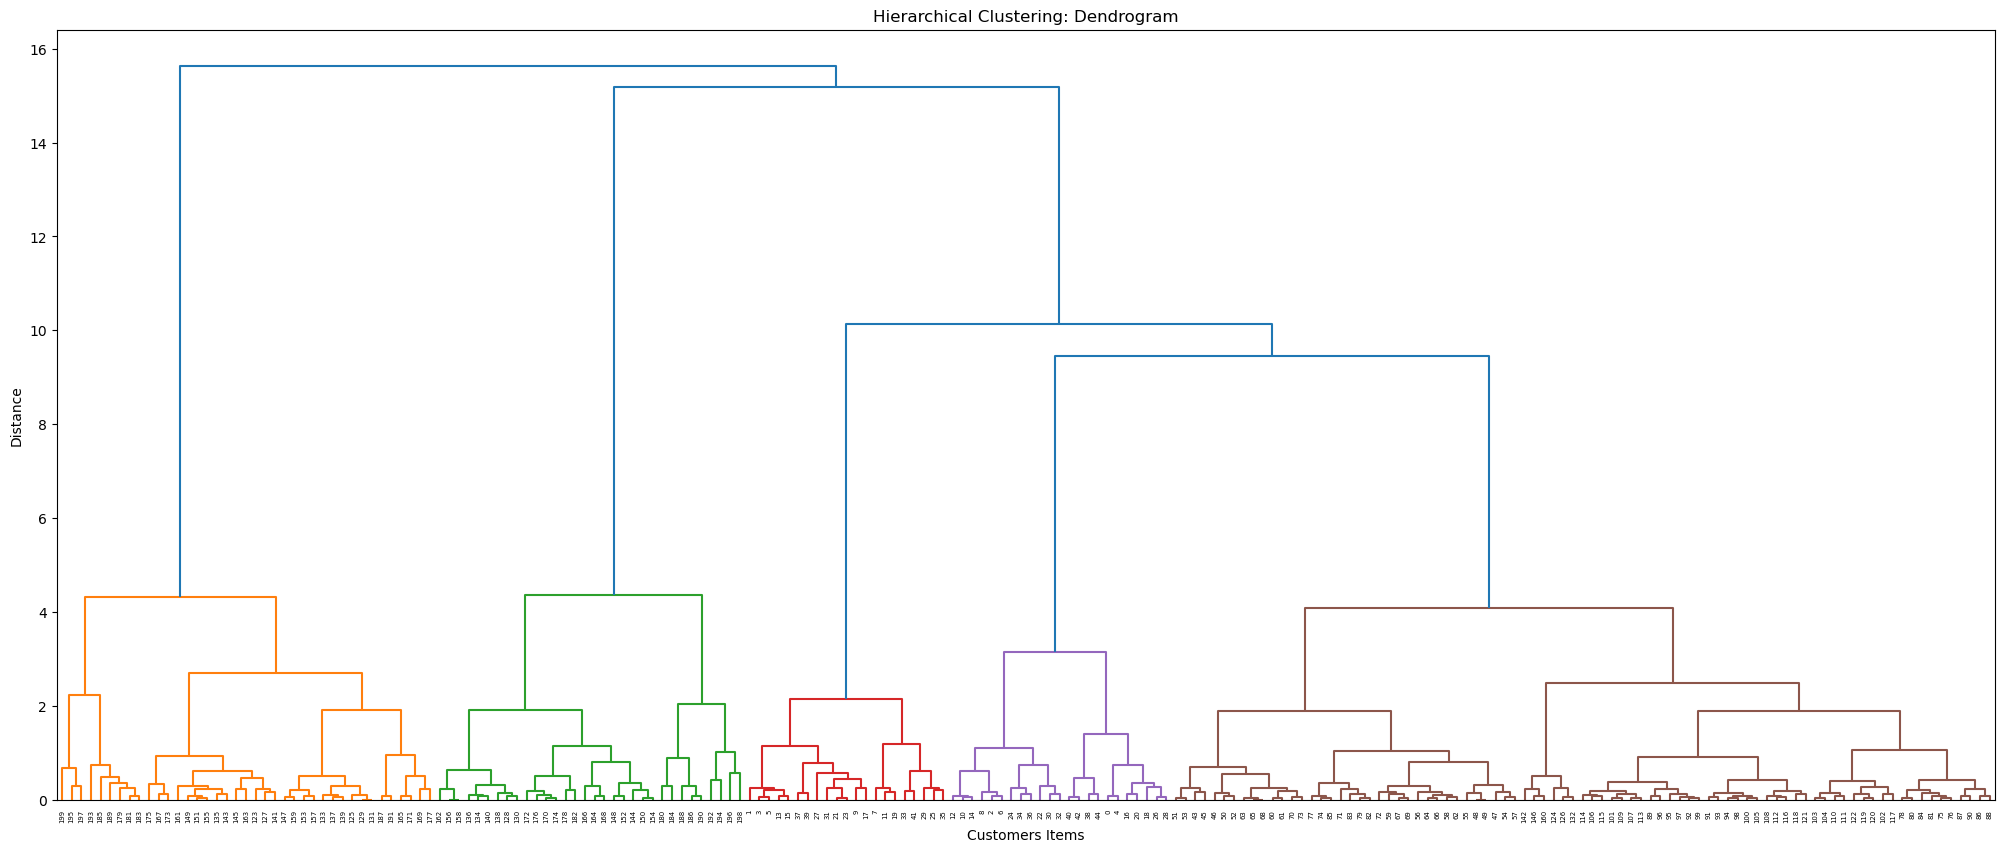

In [7]:
# Import dendrogram
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage

# create dendrogram using ward linkage
Z = linkage(data, method='ward')

fig = plt.figure(figsize=(25, 10))
dendrogram(Z, color_threshold=Z[:,2].max()/2)

# Set title of the plot
plt.title('Hierarchical Clustering: Dendrogram')
plt.xlabel('Customers Items')
plt.ylabel('Distance')
plt.show()

### Silhouette Score

In [8]:
from sklearn.metrics import silhouette_score

print("Silhouette Coefficient:", silhouette_score(data, pred))

Silhouette Coefficient: 0.46658474419000145
